In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('airline_churn_synthetic.csv')
df.info()
df.shape
df.head()

In [ ]:
# basic checks
assert df.isnull().sum().sum() == 0
assert df['customer_id'].is_unique
df['Churn'].value_counts()

In [4]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("airline_churn_synthetic (1).csv")

# -----------------------------
# 2. Check Class Imbalance
# -----------------------------
print("\n=== CLASS IMBALANCE CHECK ===")
print(df['Churned'].value_counts())
print("\nPercentage distribution:")
print(df['Churned'].value_counts(normalize=True) * 100)

# Threshold for imbalance warning
churn_pct = df['Churned'].value_counts(normalize=True) * 100
if churn_pct.max() > 70:
    print("\n⚠️ WARNING: Severe class imbalance detected!")
elif churn_pct.max() > 60:
    print("\n⚠️ Moderate class imbalance detected.")

# -----------------------------
# 3. Detect Categorical Feature Imbalance
# -----------------------------
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

if 'Churned' in categorical_cols:
    categorical_cols.remove('Churned')  # target should not be included here

print("\n=== CATEGORICAL FEATURE IMBALANCE ===")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    dist = df[col].value_counts(normalize=True) * 100
    print(dist.round(2))

    # Highlight minority categories
    low_freq = dist[dist < 5]
    if len(low_freq) > 0:
        print("⚠️ Underrepresented categories (<5%):")
        print(low_freq)

# -----------------------------
# 4. Bias Check: Churn Rate Across Categorical Features
# -----------------------------
print("\n=== BIAS CHECK — CHURN RATE BY GROUP ===")

for col in categorical_cols:
    print(f"\nChurn rate by: {col}")
    table = pd.crosstab(df[col], df['Churned'], normalize='index') * 100
    print(table.round(2))

    # Identify potential bias
    if table[1].max() - table[1].min() > 20:
        print("⚠️ Potential bias detected — churn rate differs >20% between groups.")

# -----------------------------
# 5. Bias Check for Numerical Features
# -----------------------------
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

if 'Churned' in num_cols:
    num_cols.remove('Churned')

print("\n=== NUMERICAL FEATURE BIAS CHECK ===")
print(df.groupby('Churned')[num_cols].mean().round(2))

print("\nBias detection complete.")



=== CLASS IMBALANCE CHECK ===
Churned
0    5000
1    5000
Name: count, dtype: int64

Percentage distribution:
Churned
0    50.0
1    50.0
Name: proportion, dtype: float64

=== CATEGORICAL FEATURE IMBALANCE ===

Column: Passenger_Demographic_Segment
Passenger_Demographic_Segment
26-35_Europe_Leisure_Medium           1.16
46-55_North America_Leisure_Medium    1.06
46-55_Europe_Leisure_Medium           1.05
18-25_Asia-Pacific_Leisure_Medium     1.01
26-35_Asia-Pacific_Leisure_Medium     1.00
                                      ... 
46-55_Latin America_Mixed_Low         0.04
65+_Middle East_Mixed_Low             0.04
65+_Latin America_Mixed_Low           0.03
26-35_Latin America_Mixed_Low         0.02
46-55_Middle East_Mixed_Low           0.02
Name: proportion, Length: 270, dtype: float64
⚠️ Underrepresented categories (<5%):
Passenger_Demographic_Segment
26-35_Europe_Leisure_Medium           1.16
46-55_North America_Leisure_Medium    1.06
46-55_Europe_Leisure_Medium           1.05
18-2

C:\Users\Admin\AppData\Local\Temp\ipykernel_12436\1073676563.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,0], x='Churned', data=df, palette='Set2')


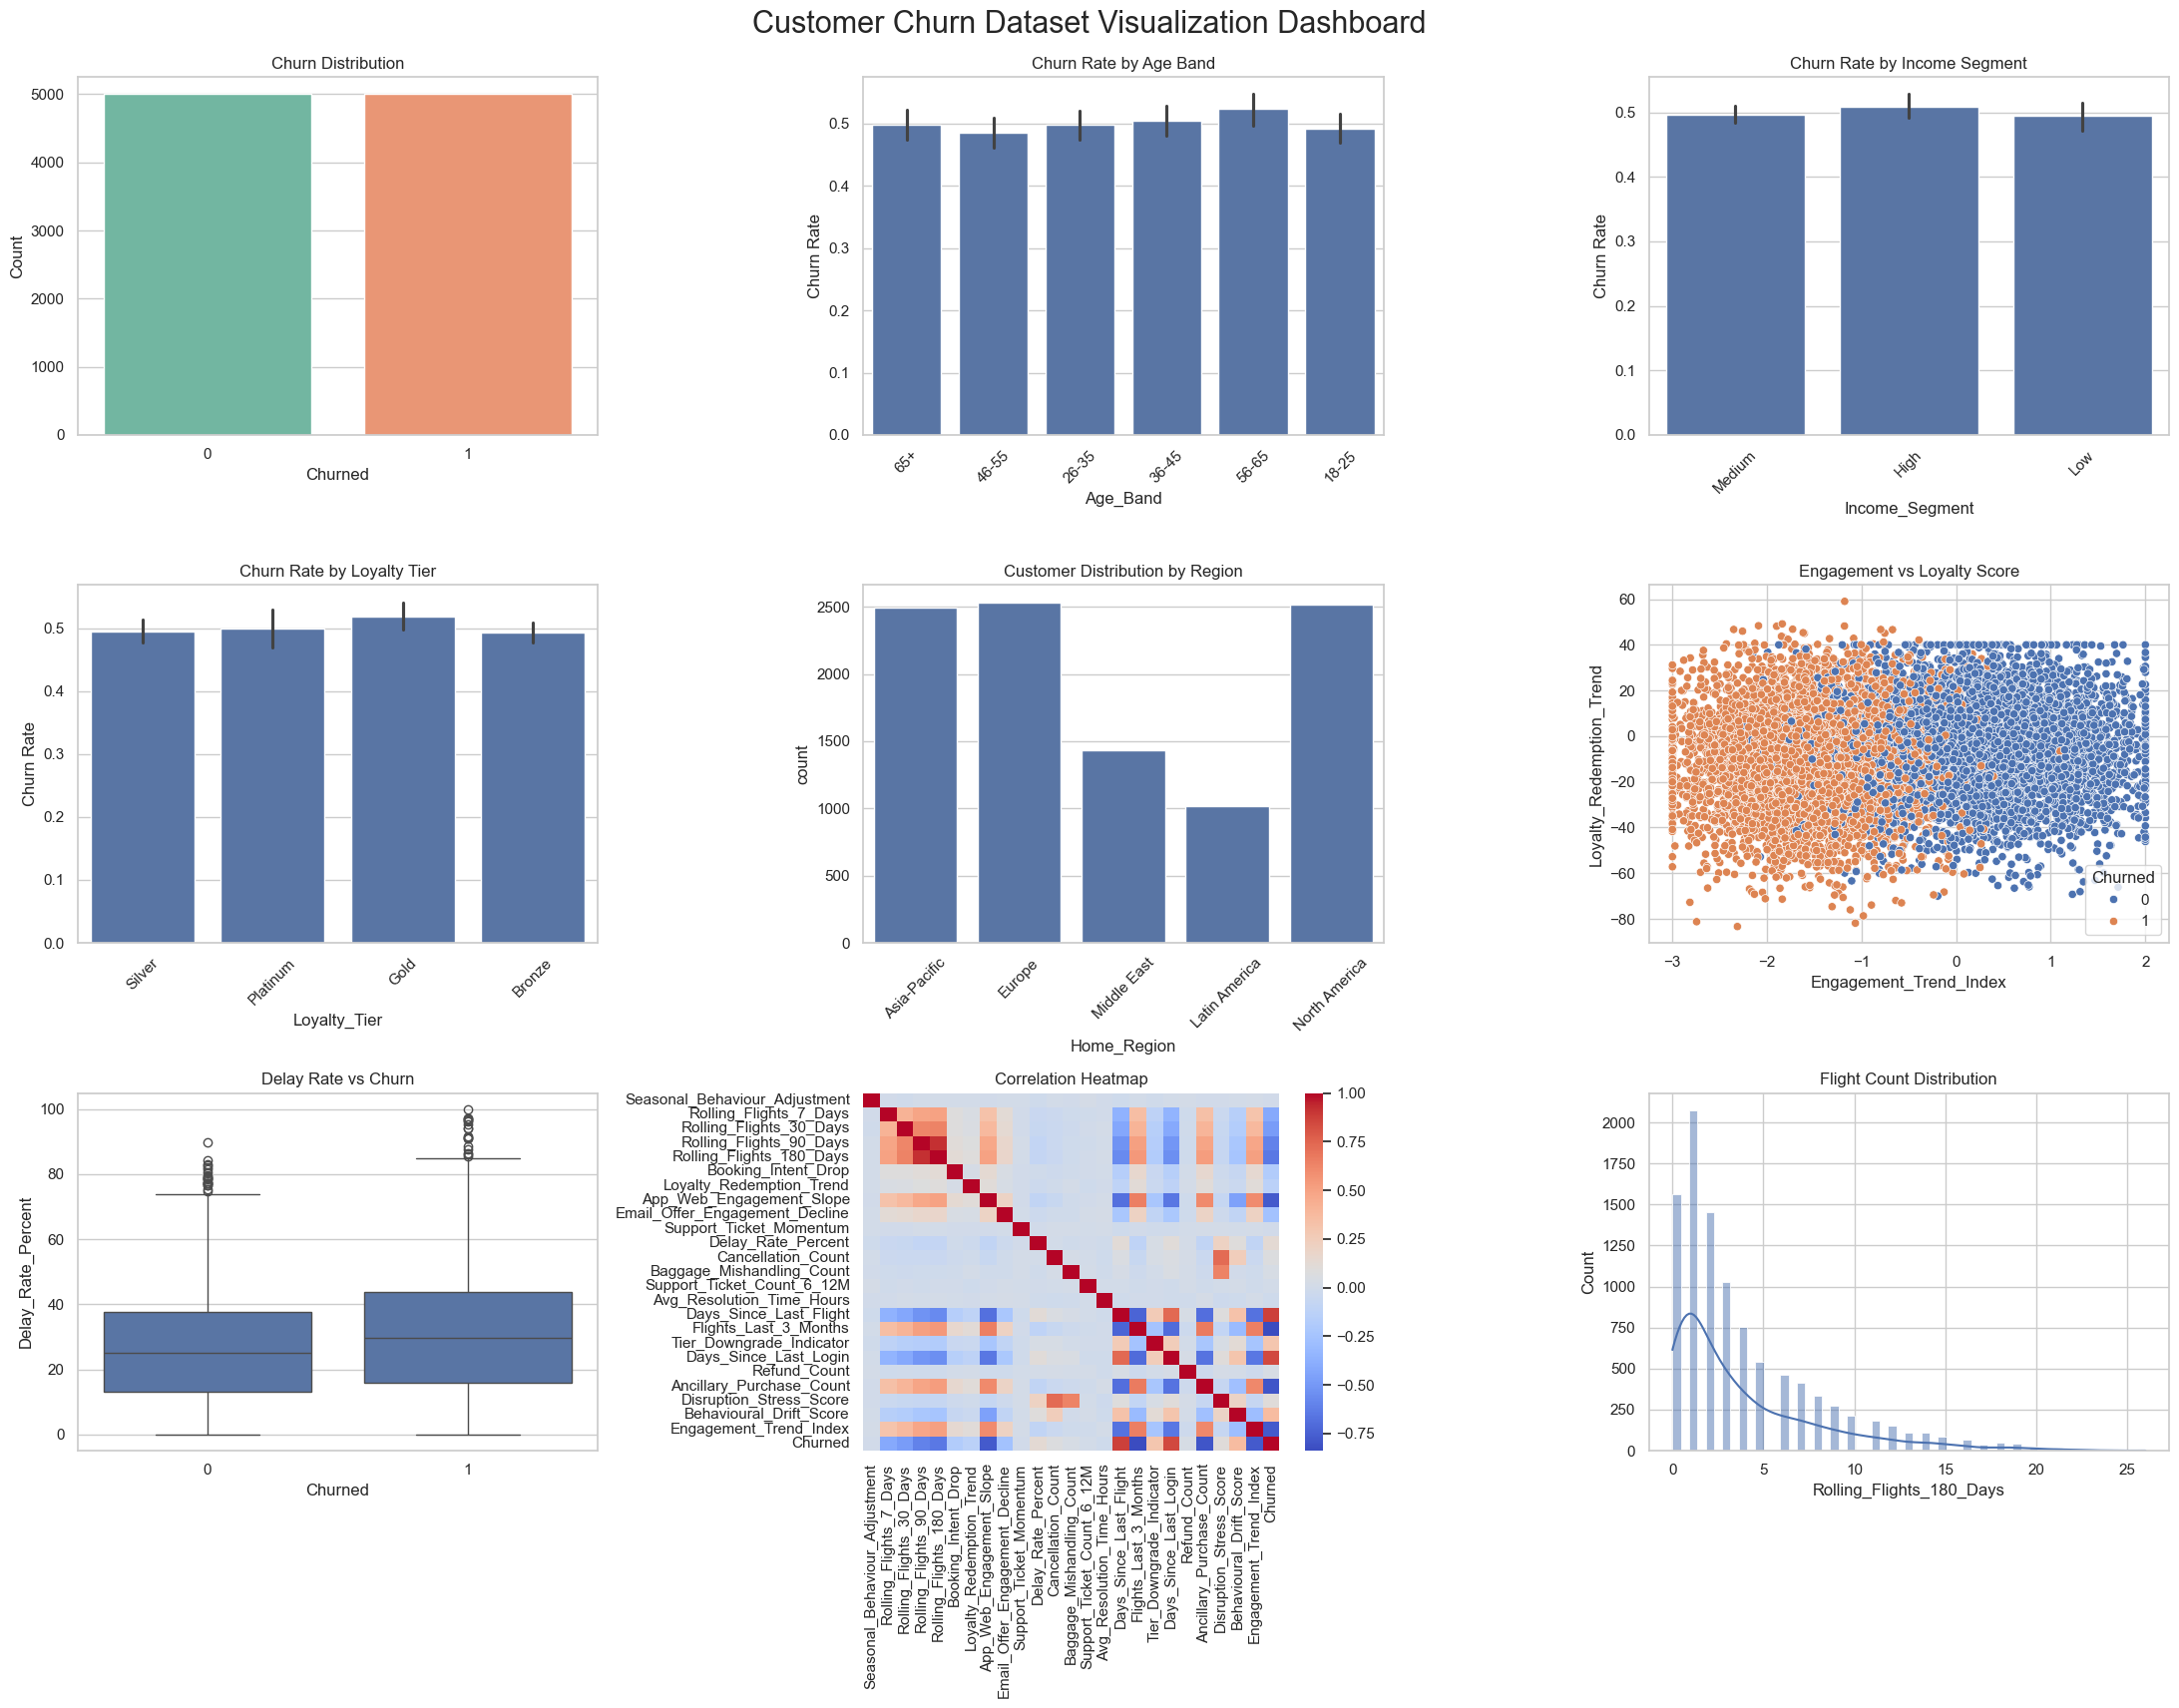

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("airline_churn_synthetic (1).csv")

# Set style
sns.set(style="whitegrid")

# Create a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(22, 18))
fig.suptitle("Customer Churn Dataset Visualization Dashboard", fontsize=22, y=0.95)

# ---------------------------------------------------------
# 1. Churn Distribution
sns.countplot(ax=axes[0,0], x='Churned', data=df, palette='Set2')
axes[0,0].set_title("Churn Distribution")
axes[0,0].set_xlabel("Churned")
axes[0,0].set_ylabel("Count")

# ---------------------------------------------------------
# 2. Churn by Age Band
if 'Age_Band' in df.columns:
    sns.barplot(ax=axes[0,1], x='Age_Band', y='Churned', data=df, estimator=lambda x: sum(x)/len(x))
    axes[0,1].set_title("Churn Rate by Age Band")
    axes[0,1].set_ylabel("Churn Rate")
    axes[0,1].tick_params(axis='x', rotation=45)

# ---------------------------------------------------------
# 3. Churn by Income Segment
if 'Income_Segment' in df.columns:
    sns.barplot(ax=axes[0,2], x='Income_Segment', y='Churned', data=df, estimator=lambda x: sum(x)/len(x))
    axes[0,2].set_title("Churn Rate by Income Segment")
    axes[0,2].set_ylabel("Churn Rate")
    axes[0,2].tick_params(axis='x', rotation=45)

# ---------------------------------------------------------
# 4. Churn by Loyalty Tier
if 'Loyalty_Tier' in df.columns:
    sns.barplot(ax=axes[1,0], x='Loyalty_Tier', y='Churned', data=df, estimator=lambda x: sum(x)/len(x))
    axes[1,0].set_title("Churn Rate by Loyalty Tier")
    axes[1,0].set_ylabel("Churn Rate")
    axes[1,0].tick_params(axis='x', rotation=45)

# ---------------------------------------------------------
# 5. Customer Distribution by Region
if 'Home_Region' in df.columns:
    sns.countplot(ax=axes[1,1], x='Home_Region', data=df)
    axes[1,1].set_title("Customer Distribution by Region")
    axes[1,1].tick_params(axis='x', rotation=45)

# ---------------------------------------------------------
# 6. Engagement vs Loyalty Score
if 'Engagement_Trend_Index' in df.columns and 'Loyalty_Redemption_Trend' in df.columns:
    sns.scatterplot(ax=axes[1,2], x='Engagement_Trend_Index', y='Loyalty_Redemption_Trend', hue='Churned', data=df)
    axes[1,2].set_title("Engagement vs Loyalty Score")
    axes[1,2].set_xlabel("Engagement_Trend_Index")
    axes[1,2].set_ylabel("Loyalty_Redemption_Trend")

# ---------------------------------------------------------
# 7. Delay Rate vs Churn (Boxplot)
if 'Delay_Rate_Percent' in df.columns:
    sns.boxplot(ax=axes[2,0], x='Churned', y='Delay_Rate_Percent', data=df)
    axes[2,0].set_title("Delay Rate vs Churn")
    axes[2,0].set_xlabel("Churned")
    axes[2,0].set_ylabel("Delay_Rate_Percent")

# ---------------------------------------------------------
# 8. Correlation Heatmap (numerical)
numeric_df = df.select_dtypes(include=['int64','float64'])
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), ax=axes[2,1], cmap="coolwarm", annot=False)
    axes[2,1].set_title("Correlation Heatmap")

# ---------------------------------------------------------
# 9. Flight Count Distribution
if 'Rolling_Flights_180_Days' in df.columns:
    sns.histplot(ax=axes[2,2], data=df, x='Rolling_Flights_180_Days', kde=True)
    axes[2,2].set_title("Flight Count Distribution")
    axes[2,2].set_xlabel("Rolling_Flights_180_Days")

# ---------------------------------------------------------
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier

# ---------------------------------
# 1. Load Dataset
# ---------------------------------
df = pd.read_csv("airline_churn_synthetic (1).csv")

# Ensure churn is numeric
df['Churned'] = df['Churned'].astype(int)

# ---------------------------------
# 2. Separate features/target
# ---------------------------------
X = df.drop("Churned", axis=1)
y = df["Churned"]

# ---------------------------------
# 3. Detect categorical + numerical columns
# ---------------------------------
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# ---------------------------------
# 4. Preprocessing: OneHotEncode categoricals
# ---------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# ---------------------------------
# 5. Build XGBoost Pipeline
# ---------------------------------
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("xgb", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        scale_pos_weight=1  # updated later based on imbalance
    ))
])

# ---------------------------------
# 6. Train/test split
# ---------------------------------

# ---------------------------------
# 7. Handle Imbalance (Recommended)
# ---------------------------------
pos = sum(y == 1)
neg = sum(y == 0)
imbalance_ratio = neg / pos

model.named_steps['xgb'].set_params(scale_pos_weight=imbalance_ratio)

print(f"Setting scale_pos_weight = {imbalance_ratio:.2f} (auto from data imbalance)")

# ---------------------------------
# 8. Train Model
# ---------------------------------
model.fit(X, y)


# ---------------------------------
# 11. Save Model (Optional)
# ---------------------------------
import joblib
joblib.dump(model, "xgboost_churn_model.pkl")

print("\nModel saved as xgboost_churn_model.pkl")


Setting scale_pos_weight = 1.00 (auto from data imbalance)

Model saved as xgboost_churn_model.pkl


In [40]:
test_df = pd.read_csv("airline_churn_challenging_testset_200_v2.csv")

X_test = test_df.drop("Churned", axis=1)
y_test = test_df["Churned"]

In [41]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nAUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.515

AUC Score: 0.54855

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57       100
           1       0.52      0.39      0.45       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



In [20]:
test_churn = test_df[test_df["Churned"] == 1].reset_index(drop=True)
test_nonchurn = test_df[test_df["Churned"] == 0].reset_index(drop=True)

print("Churn customers:", test_churn.shape)
print("Non-Churn customers:", test_nonchurn.shape)

Churn customers: (100, 31)
Non-Churn customers: (100, 31)


In [21]:
test_churn.describe()

,Seasonal_Behaviour_Adjustment,Rolling_Flights_7_Days,Rolling_Flights_30_Days,Rolling_Flights_90_Days,Rolling_Flights_180_Days,Booking_Intent_Drop,Loyalty_Redemption_Trend,App_Web_Engagement_Slope,Email_Offer_Engagement_Decline,Support_Ticket_Momentum,...,Days_Since_Last_Flight,Flights_Last_3_Months,Tier_Downgrade_Indicator,Days_Since_Last_Login,Refund_Count,Ancillary_Purchase_Count,Disruption_Stress_Score,Behavioural_Drift_Score,Engagement_Trend_Index,Churned
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.0000,100.000000,100.000000,100.00000,100.000000,100.0
mean,-11.337700,0.160000,0.150000,0.600000,3.310000,-9.276500,0.704100,-0.316580,-12.875200,17.278000,...,173.910000,0.890000,0.170000,74.09000,0.2400,5.310000,45.412600,40.96390,-0.388620,1.0
std,18.950218,0.465366,0.609272,2.498484,6.879475,20.608924,16.581741,1.119399,16.083068,23.139847,...,86.962792,1.441765,0.377525,64.30563,0.6215,8.311723,21.488101,26.28612,1.289298,0.0
min,-49.360000,0.000000,0.000000,0.000000,0.000000,-70.800000,-46.000000,-2.000000,-70.170000,0.000000,...,30.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00000,-3.000000,1.0
25%,-24.700000,0.000000,0.000000,0.000000,0.000000,-23.212500,-11.857500,-1.380250,-21.952500,1.052500,...,109.000000,0.000000,0.000000,7.75000,0.0000,2.000000,28.425000,17.82250,-1.374250,1.0
50%,-13.525000,0.000000,0.000000,0.000000,0.000000,-8.615000,0.630000,-0.187000,-8.905000,8.290000,...,150.500000,1.000000,0.000000,67.50000,0.0000,3.500000,49.170000,40.96500,-0.396500,1.0
75%,2.857500,0.000000,0.000000,0.000000,1.000000,8.440000,10.710000,0.850750,-2.700000,19.630000,...,219.000000,1.000000,0.000000,115.75000,0.0000,5.000000,62.077500,56.95500,0.607000,1.0
max,30.000000,2.000000,3.000000,14.000000,27.000000,20.000000,40.000000,1.000000,10.000000,99.080000,...,438.000000,10.000000,1.000000,240.00000,3.0000,50.000000,93.230000,100.00000,2.000000,1.0


In [22]:
test_nonchurn.describe()

,Seasonal_Behaviour_Adjustment,Rolling_Flights_7_Days,Rolling_Flights_30_Days,Rolling_Flights_90_Days,Rolling_Flights_180_Days,Booking_Intent_Drop,Loyalty_Redemption_Trend,App_Web_Engagement_Slope,Email_Offer_Engagement_Decline,Support_Ticket_Momentum,...,Days_Since_Last_Flight,Flights_Last_3_Months,Tier_Downgrade_Indicator,Days_Since_Last_Login,Refund_Count,Ancillary_Purchase_Count,Disruption_Stress_Score,Behavioural_Drift_Score,Engagement_Trend_Index,Churned
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.0000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.0
mean,-6.567700,0.400000,0.940000,0.80000,3.50000,-17.070200,-1.75350,-0.523070,-17.177200,22.039400,...,166.760000,1.0800,0.170000,68.43000,0.140000,5.730000,43.295600,32.244500,-0.31974,0.0
std,15.949021,0.666667,1.455189,2.74506,7.07321,20.421904,19.83118,1.075926,20.231279,25.297067,...,87.385726,1.8295,0.377525,62.76254,0.376588,5.562964,19.994061,20.663717,1.33777,0.0
min,-49.360000,0.000000,0.000000,0.00000,0.00000,-80.000000,-54.68000,-2.000000,-66.680000,0.000000,...,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-3.00000,0.0
25%,-16.280000,0.000000,0.000000,0.00000,0.00000,-27.507500,-12.68750,-1.494000,-29.765000,3.610000,...,106.750000,0.0000,0.000000,10.00000,0.000000,3.000000,30.272500,16.722500,-1.38775,0.0
50%,-9.145000,0.000000,0.000000,0.00000,0.00000,-12.700000,-2.05000,-0.585500,-16.175000,11.435000,...,150.000000,1.0000,0.000000,53.00000,0.000000,5.000000,44.055000,30.990000,-0.29650,0.0
75%,3.612500,1.000000,2.000000,0.00000,2.25000,-6.300000,11.17250,0.466500,2.140000,34.597500,...,226.750000,1.0000,0.000000,118.00000,0.000000,8.000000,56.630000,46.117500,0.74900,0.0
max,30.000000,2.000000,4.000000,13.00000,27.00000,20.000000,40.00000,1.000000,10.000000,100.000000,...,416.000000,10.0000,1.000000,233.00000,2.000000,50.000000,87.970000,84.600000,2.00000,0.0
